# O que é um Labirinto?
### Definição utilizada:
Conjunto de $N^2$ nós, dispostos sobre uma matriz quadrada $N \times N$, tal que existe um caminho possível para o nó dito adjacente ou uma parede entre nós.

#### Labirinto Perfeito: 
Um labirinto é dito perfeito se o conjunto de nós for um caso de uma árvore, isto é, se existe um, e apenas um caminho entre um nó e outro.

Essa definição nos ajuda a simplificar o problema e a escolha dos algoritmos para a criação e resolução de um Labirinto Perfeito.

#### Algoritmos utilizados:
1) Busca em Profundidade (DFS)
2) Busca em Largura (BFS)



In [1]:
import numpy as np
import random
from queue import Queue
import matplotlib.pyplot as plt

In [2]:
def create_maze(dim):
    # Create a grid filled with walls
    maze = np.ones((dim*2+1, dim*2+1))

    # Define the starting point
    x, y = (0, 0)
    maze[2*x+1, 2*y+1] = 0

    # Initialize the stack with the starting point
    stack = [(x, y)]
    while len(stack) > 0:
        x, y = stack[-1]

        # Define possible directions
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        random.shuffle(directions)

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if nx >= 0 and ny >= 0 and nx < dim and ny < dim and maze[2*nx+1, 2*ny+1] == 1:
                maze[2*nx+1, 2*ny+1] = 0
                maze[2*x+1+dx, 2*y+1+dy] = 0
                stack.append((nx, ny))
                break
        else:
            stack.pop()
            
    # Create an entrance and an exit
    maze[1, 0] = 0
    maze[-2, -1] = 0

    return maze

In [3]:
def find_path(maze):
    # BFS algorithm to find the shortest path
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    start = (1, 1)
    end = (maze.shape[0]-2, maze.shape[1]-2)
    visited = np.zeros_like(maze, dtype=bool)
    visited[start] = True
    queue = Queue()
    queue.put((start, []))
    while not queue.empty():
        (node, path) = queue.get()
        for dx, dy in directions:
            next_node = (node[0]+dx, node[1]+dy)
            if (next_node == end):
                return path + [next_node]
            if (next_node[0] >= 0 and next_node[1] >= 0 and 
                next_node[0] < maze.shape[0] and next_node[1] < maze.shape[1] and 
                maze[next_node] == 0 and not visited[next_node]):
                visited[next_node] = True
                queue.put((next_node, path + [next_node]))


In [4]:
def draw_maze(maze, path=None):
    fig, ax = plt.subplots(figsize=(10,10))
    
    # Set the border color to white
    fig.patch.set_edgecolor('white')
    fig.patch.set_linewidth(0)

    ax.imshow(maze, cmap=plt.cm.binary, interpolation='nearest')
    
    # Draw the solution path if it exists
    if path is not None:
        x_coords = [x[1] for x in path]
        y_coords = [y[0] for y in path]
        ax.plot(x_coords, y_coords, color='red', linewidth=2)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    # Draw entry and exit arrows
    ax.arrow(0, 1, .4, 0, fc='green', ec='green', head_width=0.3, head_length=0.3)
    ax.arrow(maze.shape[1] - 1, maze.shape[0]  - 2, 0.4, 0, fc='blue', ec='blue', head_width=0.3, head_length=0.3)
    
    plt.show()

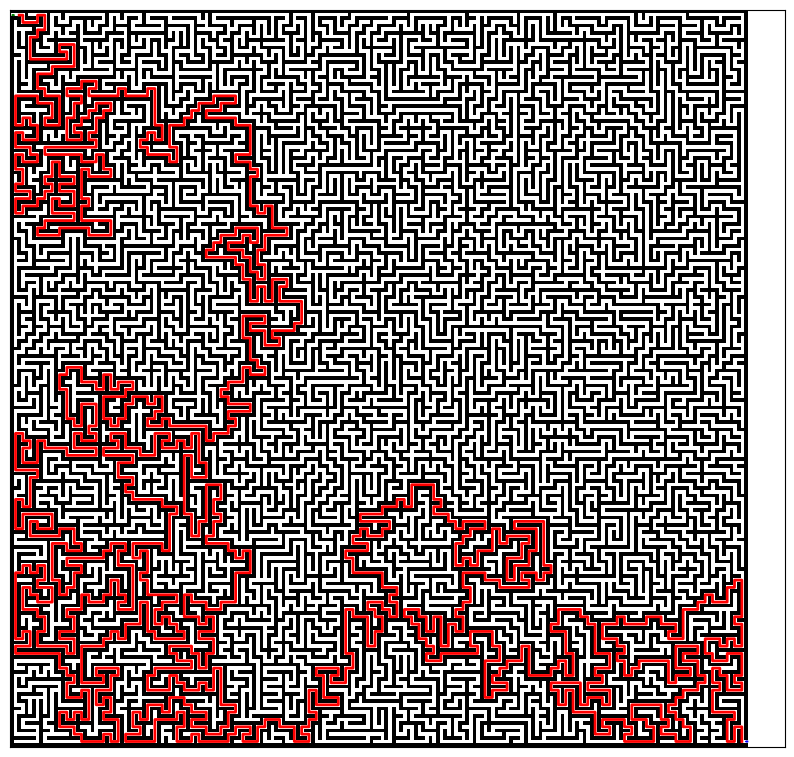

In [8]:
dim = 100
maze = create_maze(dim)
path = find_path(maze)
draw_maze(maze, path)